# 1. Import Library

In [52]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 2. Data Formatting of Raw Files

## 2.1 Electricity Generation Monthly Vietnam Data

In [53]:
# Đọc dữ liệu từ file CSV
data_path = r"PROCESSING_DATA\Electricity Generation Monthly Vietnam.csv"
df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Thời gian  316 non-null    object 
 1   Sản lượng  316 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB


In [54]:
df.head(10)

,Thời gian,Sản lượng
0,01/1998,1685.1
1,02/1998,1571.1
2,03/1998,1814.4
3,04/1998,1797.4
4,05/1998,1798.1
5,06/1998,1844.8
6,07/1998,1903.0
7,08/1998,1978.3
8,09/1998,1880.0
9,10/1998,1793.7


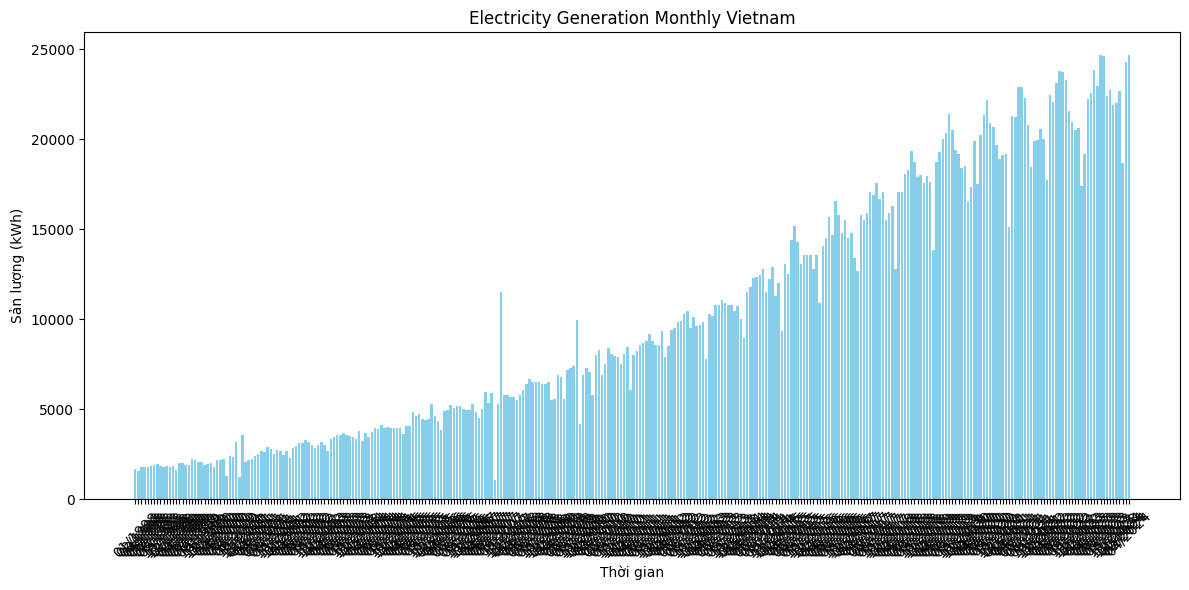

In [55]:
# Tạo biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(df['Thời gian'], df['Sản lượng'], color='skyblue')
plt.title('Electricity Generation Monthly Vietnam')
plt.xlabel('Thời gian')
plt.ylabel('Sản lượng (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

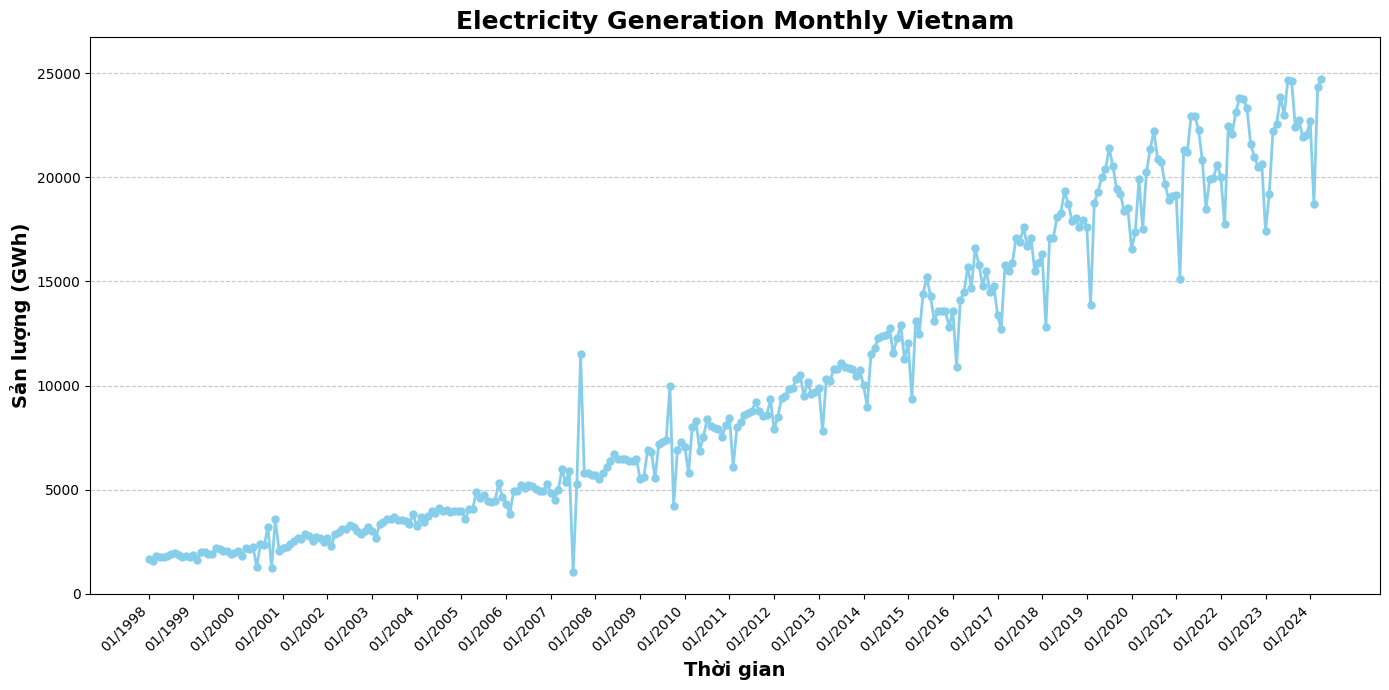

In [56]:
# Tạo biểu đồ đường
plt.figure(figsize=(14, 7))
plt.plot(df['Thời gian'], df['Sản lượng'], marker='o', linestyle='-', color='skyblue', markersize=5, linewidth=2)

# Định dạng trục x để không bị chồng chéo
plt.xticks(ticks=range(0, len(df), 12), labels=df['Thời gian'][::12], rotation=45, ha='right')

# Thêm tiêu đề và nhãn trục
plt.title('Electricity Generation Monthly Vietnam', fontsize=18, fontweight='bold')
plt.xlabel('Thời gian', fontsize=14, fontweight='bold')
plt.ylabel('Sản lượng (GWh)', fontsize=14, fontweight='bold')

# Thêm lưới
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Điều chỉnh bố cục
plt.tight_layout()

# Thêm một chút định dạng tùy chọn cho trục y
plt.ylim(0, df['Sản lượng'].max() + 2000)

# Hiển thị biểu đồ
plt.show()

In [57]:
# Tách cột 'Thời gian' thành cột 'Năm' và 'Tháng'
df[['Tháng', 'Năm']] = df['Thời gian'].str.split('/', expand=True)

# Chuyển đổi cột 'Năm' và 'Tháng' sang kiểu số nguyên
df['Năm'] = df['Năm'].astype(int)
df['Tháng'] = df['Tháng'].astype(int)

# Đổi thứ tự cột và hiển thị kết quả
df = df[['Năm', 'Tháng', 'Sản lượng']]

# Hiển thị vài dòng đầu tiên của DataFrame mới để kiểm tra
print(df.head())

# Lưu DataFrame mới vào file CSV
df.to_csv(r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\Electricity_Generation_Processed.csv", index=False)

    Năm  Tháng  Sản lượng
0  1998      1     1685.1
1  1998      2     1571.1
2  1998      3     1814.4
3  1998      4     1797.4
4  1998      5     1798.1


## 2.2 Population Data

In [58]:
data_path = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\PROCESSING_DATA\Population.csv"
df = pd.read_csv(data_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Thời gian  26 non-null     int64
 1   Dân số     26 non-null     int64
dtypes: int64(2)
memory usage: 548.0 bytes


In [59]:
df.head(50)

,Thời gian,Dân số
0,1998,75456300
1,1999,76596700
2,2000,77630900
3,2001,78620500
4,2002,79537700
5,2003,80467400
6,2004,81436400
7,2005,82392100
8,2006,83311200
9,2007,84218500


In [60]:
# Mở file CSV
with open(data_path, mode='r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)

    # Bỏ qua dòng tiêu đề
    next(csv_reader)

    # Tạo dictionary
    population_dict = {row[0]: int(row[1]) for row in csv_reader}

print(population_dict)

{'1998': 75456300, '1999': 76596700, '2000': 77630900, '2001': 78620500, '2002': 79537700, '2003': 80467400, '2004': 81436400, '2005': 82392100, '2006': 83311200, '2007': 84218500, '2008': 85118700, '2009': 86025000, '2010': 87067300, '2011': 88145800, '2012': 89202900, '2013': 90191400, '2014': 91203800, '2015': 92228600, '2016': 93250700, '2017': 94286000, '2018': 95385200, '2019': 96484000, '2020': 97582690, '2021': 98504400, '2022': 99474420, '2023': 100348250}


In [61]:
population_year_month = defaultdict(lambda: defaultdict(lambda: 0))

for year in range(1998, 2023):
    population_gap = population_dict[str(year+1)] - population_dict[str(year)]
    population_year_month[year][1] = population_dict[str(year)]
    for month in range(2, 13):
        population_year_month[year][month] = round(population_dict[str(year)] + population_gap / 12 * (month-1), 2)

for year in range(1998, 2023):
    for month in range(1, 13):
        print(f"Year: {year}, Month: {month}, Population: {population_year_month[year][month]}")
        

Year: 1998, Month: 1, Population: 75456300
Year: 1998, Month: 2, Population: 75551333.33
Year: 1998, Month: 3, Population: 75646366.67
Year: 1998, Month: 4, Population: 75741400.0
Year: 1998, Month: 5, Population: 75836433.33
Year: 1998, Month: 6, Population: 75931466.67
Year: 1998, Month: 7, Population: 76026500.0
Year: 1998, Month: 8, Population: 76121533.33
Year: 1998, Month: 9, Population: 76216566.67
Year: 1998, Month: 10, Population: 76311600.0
Year: 1998, Month: 11, Population: 76406633.33
Year: 1998, Month: 12, Population: 76501666.67
Year: 1999, Month: 1, Population: 76596700
Year: 1999, Month: 2, Population: 76682883.33
Year: 1999, Month: 3, Population: 76769066.67
Year: 1999, Month: 4, Population: 76855250.0
Year: 1999, Month: 5, Population: 76941433.33
Year: 1999, Month: 6, Population: 77027616.67
Year: 1999, Month: 7, Population: 77113800.0
Year: 1999, Month: 8, Population: 77199983.33
Year: 1999, Month: 9, Population: 77286166.67
Year: 1999, Month: 10, Population: 7737235

In [62]:
# Chuẩn bị dữ liệu để lưu vào CSV
csv_data = []
for year in range(1998, 2023):
    for month in range(1, 13):
        csv_data.append([year, month, population_year_month[year][month]])

# Tạo DataFrame từ dữ liệu
df_population_monthly = pd.DataFrame(csv_data, columns=["Year", "Month", "Population"])

# Lưu DataFrame vào file CSV
df_population_monthly.to_csv(r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\population_monthly.csv", index=False)

print(df_population_monthly.head(24))  # Hiển thị dữ liệu của hai năm đầu tiên để kiểm tra

     Năm  Tháng       Dân số
0   1998      1  75456300.00
1   1998      2  75551333.33
2   1998      3  75646366.67
3   1998      4  75741400.00
4   1998      5  75836433.33
5   1998      6  75931466.67
6   1998      7  76026500.00
7   1998      8  76121533.33
8   1998      9  76216566.67
9   1998     10  76311600.00
10  1998     11  76406633.33
11  1998     12  76501666.67
12  1999      1  76596700.00
13  1999      2  76682883.33
14  1999      3  76769066.67
15  1999      4  76855250.00
16  1999      5  76941433.33
17  1999      6  77027616.67
18  1999      7  77113800.00
19  1999      8  77199983.33
20  1999      9  77286166.67
21  1999     10  77372350.00
22  1999     11  77458533.33
23  1999     12  77544716.67


## 2.3 Hours Of Sunshine Data

In [68]:
data_path = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\PROCESSING_DATA\V01.07-_hours-of-sunshine_.csv"

df = pd.read_csv(data_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Năm         315 non-null    int64  
 1   Địa phương  315 non-null    object 
 2   1           315 non-null    float64
 3   2           315 non-null    float64
 4   3           315 non-null    float64
 5   4           315 non-null    float64
 6   5           315 non-null    float64
 7   6           315 non-null    float64
 8   7           315 non-null    float64
 9   8           315 non-null    float64
 10  9           315 non-null    float64
 11  10          314 non-null    float64
 12  11          315 non-null    float64
 13  12          315 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 34.6+ KB


In [69]:
df.head(16)

,Năm,Địa phương,1,2,3,4,5,6,7,8,9,10,11,12
0,2022,Lai Châu,145.9,124.7,168.2,194.0,121.4,62.8,217.8,183.8,133.6,182.8,197.9,88.9
1,2022,Sơn La,150.2,82.6,160.8,197.0,136.1,130.9,237.3,199.9,154.2,220.4,209.2,83.0
2,2022,Tuyên Quang,35.1,13.2,27.7,125.9,105.4,174.7,232.2,203.6,147.5,178.7,152.5,94.2
3,2022,Hà Nội (Láng),39.9,30.9,41.2,121.7,91.4,169.6,174.7,145.1,118.7,163.6,120.0,91.4
4,2022,Bãi Cháy,52.7,31.7,61.8,116.8,96.2,136.7,195.7,156.0,137.5,180.0,143.2,115.2
5,2022,Nam Định,34.4,27.5,49.4,108.2,88.8,186.6,190.7,151.7,133.2,165.0,126.2,102.1
6,2022,Vinh,53.8,22.4,67.8,146.1,151.4,212.6,240.7,195.5,154.0,132.8,114.1,44.4
7,2022,Huế,118.3,37.2,138.7,167.2,139.5,279.7,260.8,207.2,167.4,85.2,162.0,47.1
8,2022,Đà Nẵng,139.6,69.6,172.7,183.5,164.9,289.9,266.0,223.8,183.5,127.8,166.3,55.2
9,2022,Quy Nhơn,194.6,124.0,241.8,230.1,246.0,310.8,248.9,237.3,197.0,150.9,157.2,88.9


In [72]:
PROVINCES = list(set(df["Địa phương"]))
PROVINCES

['Tuyên Quang',
 'Hà Nội (Láng)',
 'Pleiku',
 'Nha Trang',
 'Đà Lạt',
 'Vinh',
 'Quy Nhơn',
 'Bãi Cháy',
 'Nam Định',
 'Sơn La',
 'Đà Nẵng',
 'Lai Châu',
 'Vũng Tàu',
 'Cà Mau',
 'Huế']

In [83]:
sunshine = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

for index, row in df.iterrows():
    year = row['Năm']
    province = row['Địa phương']
    for month in range(1, 13):
        # print(f"Year: {year}, Month: {month} Province: {province}, Value: {row[str(month)]}")
        sunshine[year][month][province] = row[str(month)]

for year in range(2002, 2023):
    for month in range(1, 13):
        for province in PROVINCES:
            print(f"Year: {year}, Month: {month}, Province: {province}, Value: {sunshine[year][month][province]}")

Year: 2002, Month: 1, Province: Tuyên Quang, Value: 81.0
Year: 2002, Month: 1, Province: Hà Nội (Láng), Value: 69.0
Year: 2002, Month: 1, Province: Pleiku, Value: 299.0
Year: 2002, Month: 1, Province: Nha Trang, Value: 175.0
Year: 2002, Month: 1, Province: Đà Lạt, Value: 270.0
Year: 2002, Month: 1, Province: Vinh, Value: 83.0
Year: 2002, Month: 1, Province: Quy Nhơn, Value: 175.0
Year: 2002, Month: 1, Province: Bãi Cháy, Value: 96.0
Year: 2002, Month: 1, Province: Nam Định, Value: 75.0
Year: 2002, Month: 1, Province: Sơn La, Value: 132.0
Year: 2002, Month: 1, Province: Đà Nẵng, Value: 160.0
Year: 2002, Month: 1, Province: Lai Châu, Value: 103.0
Year: 2002, Month: 1, Province: Vũng Tàu, Value: 271.0
Year: 2002, Month: 1, Province: Cà Mau, Value: 265.0
Year: 2002, Month: 1, Province: Huế, Value: 103.0
Year: 2002, Month: 2, Province: Tuyên Quang, Value: 34.0
Year: 2002, Month: 2, Province: Hà Nội (Láng), Value: 43.0
Year: 2002, Month: 2, Province: Pleiku, Value: 265.0
Year: 2002, Month: 2

In [91]:
sunshine_monthly = defaultdict(lambda: defaultdict(lambda: float))

for year in range(2002, 2023):
    for month in range(1, 13):
        data = [sunshine[year][month][province] for province in PROVINCES]
        if any(np.isnan(data)):  # Kiểm tra nếu có bất kỳ giá trị NaN nào trong data
            data = [value for value in data if not np.isnan(value)]  # Loại bỏ giá trị NaN
        if data:  # Kiểm tra nếu data không rỗng sau khi loại bỏ NaN
            avg_value = np.nanmean(data)  # Sử dụng nanmean để tính giá trị trung bình bỏ qua NaN
            sunshine_monthly[year][month] = avg_value
            print(f"Year: {year}, Month: {month}, Data: {data}, Average Sunshine: {avg_value}")

Year: 2002, Month: 1, Data: [81.0, 69.0, 299.0, 175.0, 270.0, 83.0, 175.0, 96.0, 75.0, 132.0, 160.0, 103.0, 271.0, 265.0, 103.0], Average Sunshine: 157.13333333333333
Year: 2002, Month: 2, Data: [34.0, 43.0, 265.0, 240.0, 227.0, 32.0, 200.0, 36.0, 19.0, 145.0, 176.0, 151.0, 250.0, 252.0, 117.0], Average Sunshine: 145.8
Year: 2002, Month: 3, Data: [64.0, 66.0, 134.0, 162.0, 138.0, 41.0, 97.0, 54.0, 49.0, 177.0, 71.0, 173.0, 140.0, 150.0, 50.0], Average Sunshine: 104.4
Year: 2002, Month: 4, Data: [127.0, 124.0, 250.0, 280.0, 227.0, 175.0, 273.0, 114.0, 107.0, 250.0, 233.0, 217.0, 292.0, 264.0, 211.0], Average Sunshine: 209.6
Year: 2002, Month: 5, Data: [123.0, 147.0, 216.0, 283.0, 219.0, 178.0, 287.0, 141.0, 164.0, 160.0, 239.0, 149.0, 257.0, 224.0, 221.0], Average Sunshine: 200.53333333333333
Year: 2002, Month: 6, Data: [148.0, 136.0, 254.0, 146.0, 172.0, 209.0, 260.0, 137.0, 158.0, 119.0, 267.0, 118.0, 209.0, 155.0, 245.0], Average Sunshine: 182.2
Year: 2002, Month: 7, Data: [134.0, 10

In [92]:
# Chuyển đổi dictionary thành DataFrame
rows = []
for year in sunshine_monthly:
    for month in sunshine_monthly[year]:
        rows.append({"Year": year, "Month": month, "Average Sunshine": sunshine_monthly[year][month]})

df_sunshine_monthly = pd.DataFrame(rows)

# Xuất DataFrame thành file CSV
output_file_path = 'D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\sunshine_monthly.csv'  # Thay thế bằng đường dẫn tới file CSV bạn muốn lưu
df_sunshine_monthly.to_csv(output_file_path, index=False)

print(f"File CSV đã được lưu tại: {output_file_path}")

File CSV đã được lưu tại: D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\CLEAN_DATA\sunshine_monthly.csv
